In [16]:
import json
from pathlib import Path
import pandas as pd

def iter_comment_tree(comment):
    """Recursief door alle replies lopen"""
    yield comment
    for r in comment.get("replies", []):
        yield from iter_comment_tree(r)

data_dir = Path("radical/analyse_fase-kenmerken_onderzoek/Data/reddit_jsons_with_sentiment")  # <-- aanpassen
files = sorted(data_dir.glob("*.json"))

rows = []

for fp in files:
    with open(fp, "r", encoding="utf-8") as f:
        data = json.load(f)

    objects = data if isinstance(data, list) else [data]

    for obj in objects:
        post = obj.get("post", {})

        # ---- POST ----
        rows.append({
            "level": "post",
            "sentiment": str(post.get("sentiment", "")).lower()
        })

        # ---- COMMENTS + REPLIES ----
        for c in obj.get("comments", []):
            for node in iter_comment_tree(c):
                rows.append({
                    "level": "comment_or_reply",
                    "sentiment": str(node.get("sentiment", "")).lower()
                })

df = pd.DataFrame(rows)

print("Totaal rijen:", len(df))
print(df["level"].value_counts())
print(df["sentiment"].value_counts())


Totaal rijen: 87666
level
comment_or_reply    82568
post                 5098
Name: count, dtype: int64
sentiment
neutral          33772
negative         30398
very negative    11638
positive          8406
very positive     3452
Name: count, dtype: int64


In [17]:
order = ["very negative", "negative", "neutral", "positive", "very positive"]

counts = df["sentiment"].value_counts().reindex(order, fill_value=0)
perc = (counts / counts.sum() * 100).round(2)

pd.DataFrame({
    "count": counts,
    "percent": perc
})

,count,percent
sentiment,,
very negative,11638,13.28
negative,30398,34.67
neutral,33772,38.52
positive,8406,9.59
very positive,3452,3.94


In [18]:
pd.crosstab(df["level"], df["sentiment"]).reindex(columns=order)

sentiment,very negative,negative,neutral,positive,very positive
level,,,,,
comment_or_reply,11386,29930,29698,8224,3330
post,252,468,4074,182,122


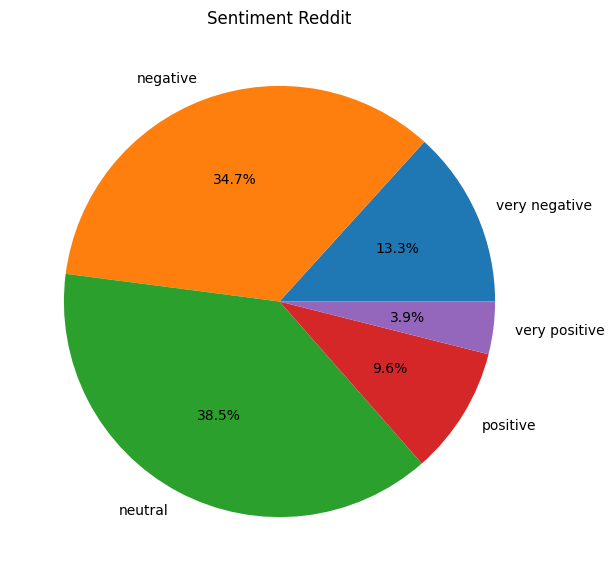

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title("Sentiment Reddit")
plt.show()

In [22]:
order = ["very negative", "negative", "neutral", "positive", "very positive"]

counts = df["sentiment"].value_counts().reindex(order, fill_value=0)
perc = (counts / counts.sum() * 100).round(2)

pd.DataFrame({
    "count": counts,
    "percent": perc
})

,count,percent
sentiment,,
very negative,11638,13.28
negative,30398,34.67
neutral,33772,38.52
positive,8406,9.59
very positive,3452,3.94


In [ ]:
import pandas as pd
import glob
import os

# pad naar je map
path = "radical/analyse_fase-kenmerken_onderzoek/Data/reddit_jsons_with_sentiment"

# alle json files ophalen
files = glob.glob(os.path.join(path, "*.json"))

# alles inladen en samenvoegen
df = pd.concat([pd.read_json(f) for f in files], ignore_index=True)

# opslaan als 1 groot json bestand
df.to_json("radical/analyse_fase-kenmerken_onderzoek/Data/reddit_jsons_with_sentiment/reddit-joined.json", orient="records", indent=2)

print("Klaar! Alle bestanden zijn samengevoegd tot reddit-joined.json")


Klaar! Alle bestanden zijn samengevoegd tot reddit-joined.json


/tmp/ipykernel_70387/1319797005.py:15: Pandas4Warning: The default 'epoch' date format is deprecated and will be removed in a future version, please use 'iso' date format instead.
  df.to_json("radical/analyse_fase-kenmerken_onderzoek/Data/reddit_jsons_with_sentiment/reddit-joined.json", orient="records", indent=2)
